# **Netflix Movies and TV Shows Analysis**

# Objectives

The objective of this project is to analyse the Netflix Shows dataset to gain insights into content release trends, content types, geographical distribution, and genre popularity. This analysis aims to understand Netflix's content strategy over time and across regions.

- Identify trends in how content is added over months and years.
- Compare the growth of movies versus TV programmes.
- Explore the countries that contribute most to Netflix's content library.
- Determine the most popular genres on Netflix.

---

# Hypotheses and Validation

### Hypothesis 1: Content Added by Month or Year (Trend)  
*The total amount of content added on Netflix varies over time, showing identifiable trends by month and year.*

**Validation:**  
- Extract month and year from the `date_added` column.  
- Aggregate counts of shows added by month and year.  
- Use Seaborn line plots to visualise trends over months and years, highlighting both seasonal patterns and long-term growth.

---

### Hypothesis 2: Compare Movies vs TV Programmes Growth  
*The number of movies and TV programmes added to Netflix grows at different rates over the years.*

**Validation:**  
- Extract the year from the `date_added` column.  
- Group data by content type (`Movie` or `TV Show`) and year added.  
- Use a Matplotlib line chart to compare yearly counts of movies and TV programmes.

---

### Hypothesis 3: Top Countries by Content Count  
*Certain countries contribute significantly more content to Netflix's library.*

**Validation:**  
- Group data by the `country` column and count shows.  
- Use a Plotly interactive bar chart or map to visualise top contributing countries.

---

### Hypothesis 4: Top Genres on Netflix  
*Some genres dominate the Netflix catalogue more than others.*

**Validation:**  
- Use the `genre` column (originally `listed_in`) as categories.  
- Count the number of shows in each genre.  
- Visualise the most common genres with a Seaborn bar chart.




---

# Section 1 - Extracting the data

In this section, I:

- Imported all required Python libraries for data analysis and visualisation (pandas, NumPy, matplotlib, seaborn, plotly)
- Loaded the dataset from the data folder
- Displayed the first few rows of the dataset to understand its structure
- Checked the column types and number of non-null values using .info()
- Used .describe() to get summary statistics of numeric variables

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Extract the data

In [2]:
df = pd.read_csv('../data/netflix_titles.csv')
# Display the first few rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Find out basic information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Display basic statistics of the dataframe
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


---

# Section 2 - Transforming Data

In this section, I performed data cleaning and preparation:

- Handled missing values and incorrect formats
- Extracted new columns
- Standardised columns like duration and genre
- Exported the cleaned data for Power BI and Python visualisation

In [5]:
df.isnull().sum() # Check for missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
int(df.duplicated().sum()) # Check for duplicate rows

0

In [7]:
#Replace missing values in 'director' and 'cast', 'country' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df.head()

C:\Users\Harpr\AppData\Local\Temp\ipykernel_9864\3599279366.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\Harpr\AppData\Local\Temp\ipykernel_9864\3599279366.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Convert 'date_added' to datetime format using mixed format to handle inconsistencies
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Drop rows with missing values in 'release_year'
df.dropna(subset=['release_year'], inplace=True)

# Drop rows with missing date_added (only 10 rows)
df.dropna(subset=['date_added'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['show_id', 'description'], inplace=True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


In [9]:
# Add columns for date
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month # Extract month
df['month_name_added']=df['date_added'].dt.month_name() # Extract month name
df['year_added'] = df['date_added'].dt.year # Extract year
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021


In [10]:
# Fill missing values in 'rating' with mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df.head(15)

C:\Users\Harpr\AppData\Local\Temp\ipykernel_9864\62886940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,September,2021
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,9,September,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,September,2021
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9,September,2021
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",9,September,2021


In [11]:
df = df.rename(columns={'listed_in': 'genre'}) # Rename column
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021


In [12]:
# Analyse duration formats and potential data issues
print("Duration format analysis:")
print("\nMovie duration samples:")
movie_durations = df[df['type'] == 'Movie']['duration'].dropna()
print(movie_durations.head(10).tolist())

print("\nTV Show duration samples:")
tv_durations = df[df['type'] == 'TV Show']['duration'].dropna()
print(tv_durations.head(10).tolist())

print("\nUnique duration patterns:")
unique_durations = df['duration'].dropna().unique()
print(f"Total unique duration values: {len(unique_durations)}")
print("First 15 unique duration values:")
print(unique_durations[:15])

# Check for any unusual patterns
print("\nChecking for unusual duration patterns:")
unusual_durations = [d for d in unique_durations if not any(x in str(d) for x in ['min', 'Season'])]
if unusual_durations:
    print("Unusual duration patterns found:", unusual_durations)
else:
    print("All duration patterns look normal (contain 'min' or 'Season')")

Duration format analysis:

Movie duration samples:
['90 min', '91 min', '125 min', '104 min', '127 min', '91 min', '67 min', '94 min', '161 min', '61 min']

TV Show duration samples:
['2 Seasons', '1 Season', '1 Season', '2 Seasons', '1 Season', '9 Seasons', '1 Season', '1 Season', '1 Season', '4 Seasons']

Unique duration patterns:
Total unique duration values: 220
First 15 unique duration values:
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min']

Checking for unusual duration patterns:
All duration patterns look normal (contain 'min' or 'Season')


In [13]:
# Save cleaned dataframe to CSV inside 'data' folder


---

# Section 3 – Data Visualisation

This section presents visual analyses of the Netflix Shows dataset to uncover patterns and insights related to content trends, types, geography, and genres. By employing a variety of graphical techniques using Python libraries such as Matplotlib, Seaborn, and Plotly, we aim to make the data more accessible and interpretable.

The visualisations will help validate our hypotheses by revealing temporal trends, comparing different content types, highlighting key countries contributing to Netflix's library, and showcasing the most popular genres. Through these graphical representations, complex data becomes clearer, aiding decision-making and deeper understanding.


In [20]:
# Count content types
type_counts = df['type'].value_counts()

# Create pie chart
fig = px.pie(
    names=type_counts.index,
    values=type_counts.values,
    color=type_counts.index,
    color_discrete_map={"Movie": "#6ad49b", "TV Show": "#a678de"},
    title="Content Type Distribution on Netflix"
)

fig.show()

### Hypothesis 1: Content Added by Month and Year (Trend)

*The total amount of content added on Netflix varies over time, showing identifiable trends by month and year.*

**Validation:**  
- Use the existing `month_name_added`, and `year_added` columns.  
- Aggregate counts of shows added by month (using month names) and year.  
- Use Seaborn line plots to visualise trends over months and years, highlighting both seasonal patterns and long-term growth.

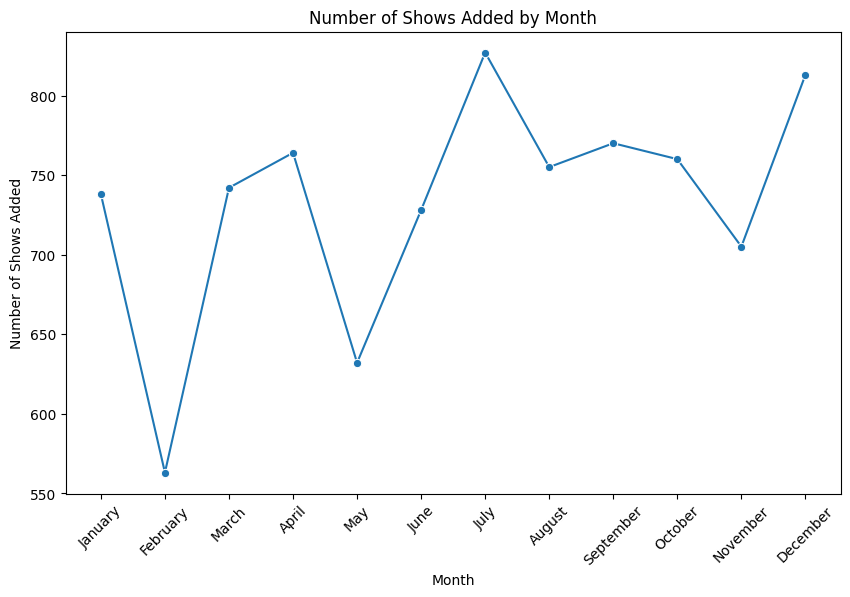

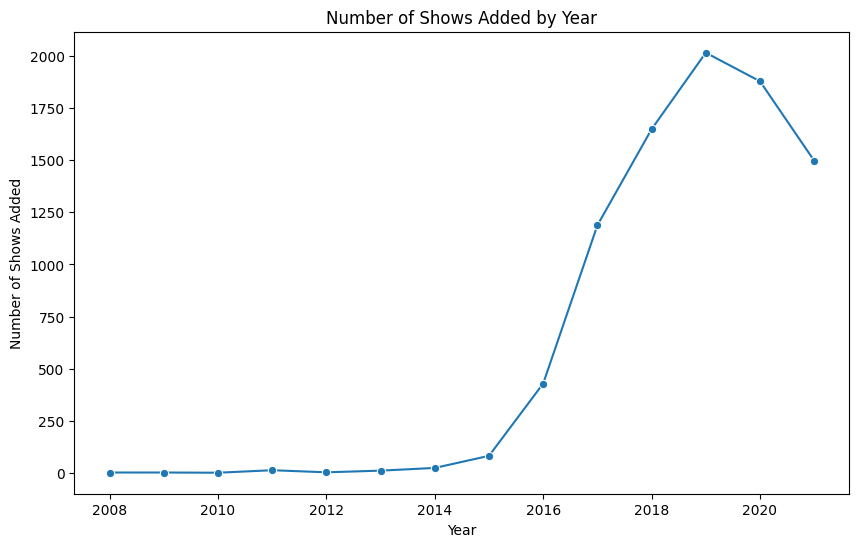

In [14]:
# Aggregate counts by month name and year
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts_by_name = df.dropna(subset=['month_name_added']).groupby('month_name_added').size()
monthly_counts_by_name = monthly_counts_by_name.reindex(months_order)

yearly_counts = df.dropna(subset=['year_added']).groupby('year_added').size()

# Plot monthly trend with month names
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_counts_by_name.index, y=monthly_counts_by_name.values, marker='o')
plt.title('Number of Shows Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows Added')
plt.xticks(rotation=45)
plt.show()

# Plot yearly trend
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Number of Shows Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.show()

### Hypothesis 2: Compare Movies vs TV Programmes Growth  

*The number of movies and TV programmes added to Netflix grows at different rates over the years.*

**Validation:**  
- Extract the year from the `date_added` column.  
- Group data by content type (`Movie` or `TV Show`) and year added.  
- Use a **Matplotlib line chart** to compare yearly counts of movies and TV programmes.

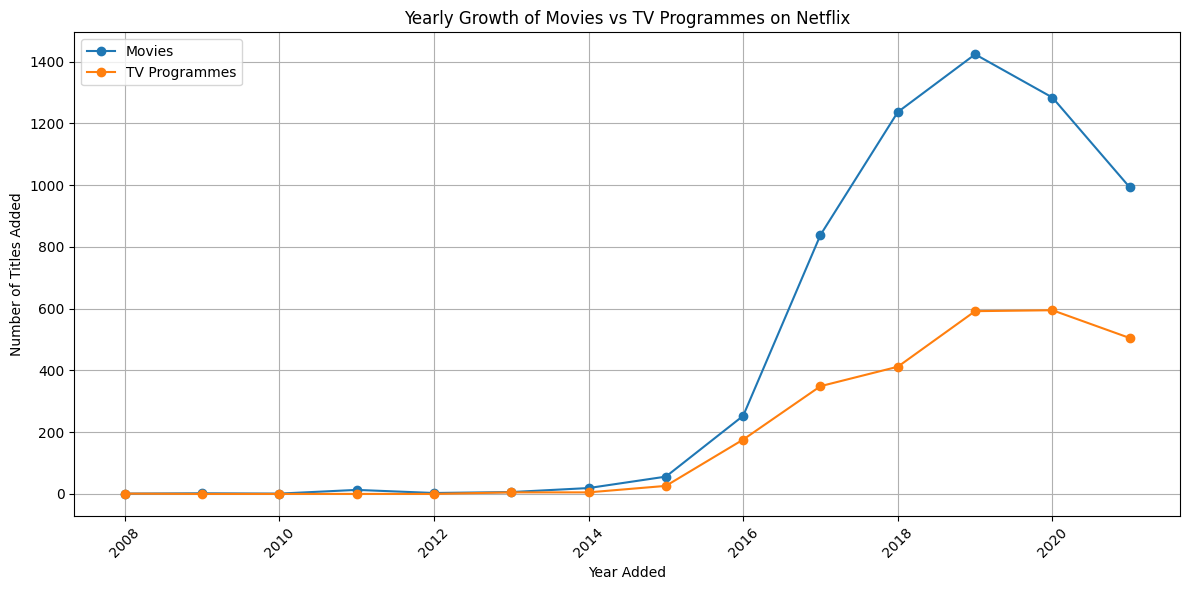

In [16]:
# Group data by 'type' and 'year_added' and count entries
yearly_counts = df.groupby(['type', 'year_added']).size().reset_index(name='count')

# Pivot the data so we have years as x-axis and types as columns
pivot_counts = yearly_counts.pivot(index='year_added', columns='type', values='count').fillna(0)

# Plotting with Matplotlib
plt.figure(figsize=(12,6))
plt.plot(pivot_counts.index, pivot_counts['Movie'], marker='o', label='Movies')
plt.plot(pivot_counts.index, pivot_counts['TV Show'], marker='o', label='TV Programmes')

plt.title('Yearly Growth of Movies vs TV Programmes on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Hypothesis 3: Top Countries by Content Count
Certain countries contribute significantly more content to Netflix's library.

**Validation**:

- Group data by the country column and count titles.
- Use a Plotly interactive bar chart to visualise the top contributing countries.

In [17]:
# Count titles by country, keeping entries as is (some may have multiple countries)
country_counts = df['country'].value_counts().head(10)

fig = px.bar(
    x=country_counts.index,
    y=country_counts.values,
    labels={'x': 'Country', 'y': 'Number of Titles'},
    title='Top 10 Countries by Number of Netflix Titles',
    color=country_counts.values,
    color_continuous_scale='Viridis'
)
fig.show()

---

# Conclusions and next step

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.